<a href="https://colab.research.google.com/github/Carnage08/Diabetes-Prediction-Using-Decision-Tree/blob/main/Diabetes_Prediction_Using_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_diabetes

In [ ]:
dataset=load_diabetes()

In [ ]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [ ]:
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [ ]:
import pandas as pd
df_diabetes=pd.DataFrame(dataset['data'],columns=dataset['feature_names'])

In [ ]:
df_diabetes

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [ ]:
## Independent and dependent features
x=df_diabetes
y=dataset['target']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
## check correlation
x_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.196083,0.202593,0.367479,0.238894,0.194840,-0.119524,0.228041,0.302274,0.345631
sex,0.196083,1.000000,0.088119,0.229459,0.010085,0.117818,-0.370008,0.301513,0.147678,0.213834
bmi,0.202593,0.088119,1.000000,0.378013,0.217977,0.238805,-0.391322,0.411254,0.432327,0.374699
bp,0.367479,0.229459,0.378013,1.000000,0.224559,0.159546,-0.193113,0.244140,0.399925,0.376167
s1,0.238894,0.010085,0.217977,0.224559,1.000000,0.880910,0.018819,0.548260,0.544285,0.309938
s2,0.194840,0.117818,0.238805,0.159546,0.880910,1.000000,-0.240253,0.661777,0.321811,0.278650
s3,-0.119524,-0.370008,-0.391322,-0.193113,0.018819,-0.240253,1.000000,-0.752319,-0.395944,-0.316024
s4,0.228041,0.301513,0.411254,0.244140,0.548260,0.661777,-0.752319,1.000000,0.624991,0.440174
s5,0.302274,0.147678,0.432327,0.399925,0.544285,0.321811,-0.395944,0.624991,1.000000,0.472258
s6,0.345631,0.213834,0.374699,0.376167,0.309938,0.278650,-0.316024,0.440174,0.472258,1.000000


In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(x_train,y_train)

DecisionTreeRegressor()

## hyper parameter tunning

In [ ]:
param={
    'criterion':['squared_error','absolute_error','poisson','friedman_mse'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features':['auto','sqrt','log2']
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=regressor,param_grid=param,cv=10,scoring='neg_mean_squared_error',n_jobs=-1)

In [ ]:
grid_search.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
359 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson', 'friedman_mse'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [ ]:
grid_search.best_score_

-4008.6745198860212

In [ ]:
y_pred=grid_search.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.38303616542515484
49.122911455040615
3856.758465393381


In [ ]:
select_model= DecisionTreeRegressor(criterion='squared_error',
 max_depth=3,
 max_features='sqrt',
 splitter='best')

In [ ]:
select_model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3, max_features='sqrt')

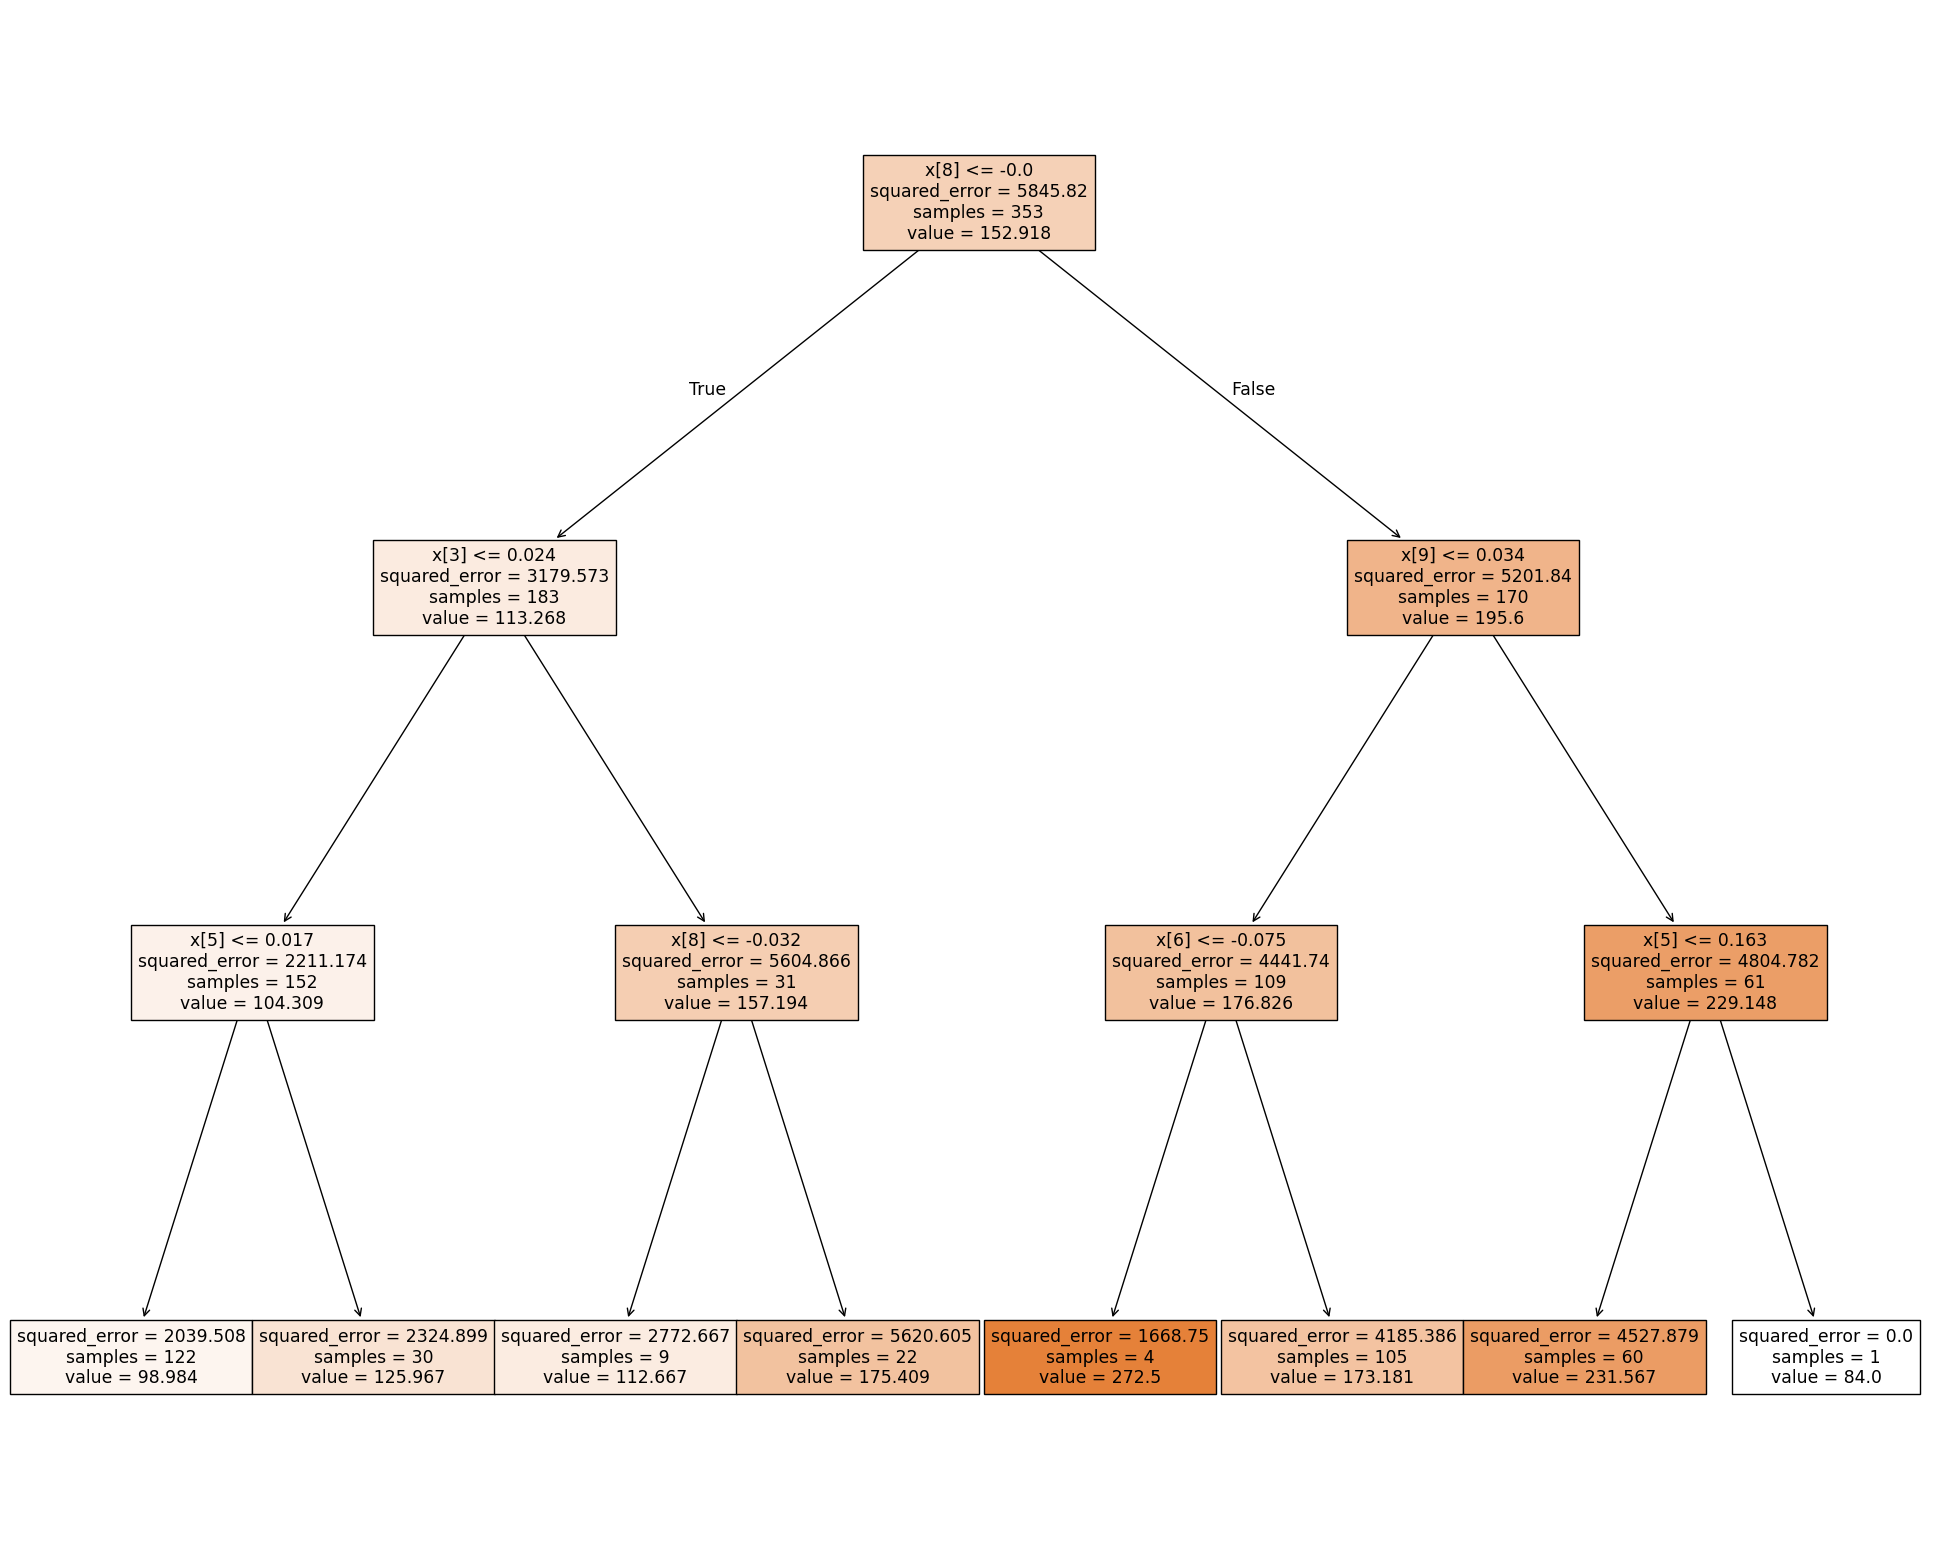

In [ ]:
## visualize the Decision Tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(25,20))
tree.plot_tree(select_model,filled=True)
plt.show()